###Importing libraries

In [1]:
import numpy as np
import pandas as pd

### Importing dataset




In [2]:
CollegeReviewCompiled = pd.read_excel('CompileReviews-8-11-2022.xlsx')
CollegeReviewCompiled.tail(2)

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
331,0.30 s,NaN,2.0,5.0,2017,www.google.com,www.google.com,University of Limerick,University of Limerick,NaN
332,Karolina,NaN,3.0,5.0,2018,www.google.com,www.google.com,University of Limerick,University of Limerick,NaN


In [3]:
Sentiment_calc=CollegeReviewCompiled.drop(['Sentiment'], axis=1)

In [4]:
def sentiments(rating):
    if  (rating >= 3):
        return 1
   # elif (rating >= 3) and (rating < 4):
    #    return 'Neutral'
    elif (rating < 3):
        return 0
   # else: return 'Neutral'
# Add sentiments to the data
Sentiment_calc['Sentiment'] = Sentiment_calc['reviewRating'].apply(sentiments)

In [5]:
dataset = pd.read_csv('dataset.csv')
dataset.tail(2)

,Unnamed: 0,reviewBody,Sentiment
273,273,Great university to attend,1.0
274,274,"Busy campus, everything you need",1.0


In [6]:
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset.head(5)

,reviewBody,Sentiment
0,Stunning new university campus near Dublin cit...,1.0
1,"Great campus to go for a walk, and with a coup...",1.0
2,I know this building has over 200 years of var...,1.0
3,Great place to sit or exercise. Well kept safe...,1.0
4,"Nice college grounds area for walking, jogging...",1.0


In [ ]:
# %cd /content/drive/MyDrive/1_LiveProjects/Project2_Sentiment_Analysis
# !ls

In [7]:
dataset.shape

(275, 2)

In [8]:
dataset.head()

,reviewBody,Sentiment
0,Stunning new university campus near Dublin cit...,1.0
1,"Great campus to go for a walk, and with a coup...",1.0
2,I know this building has over 200 years of var...,1.0
3,Great place to sit or exercise. Well kept safe...,1.0
4,"Nice college grounds area for walking, jogging...",1.0


### Data Preprocessing

In [9]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
dataset = dataset.dropna()
#dataset['reviewBody'] = dataset['reviewBody'].astype('str') # which will by default set the length to the max len it encounters

In [11]:
dataset.info()
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewBody  275 non-null    object 
 1   Sentiment   275 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


,reviewBody,Sentiment
270,Parking for visitors a big issue. Very few spa...,1.0
271,"Amazing students, amazing teachers; the colleg...",0.0
272,Bad.,0.0
273,Great university to attend,1.0
274,"Busy campus, everything you need",1.0


In [12]:
dataset.to_csv('dataset.csv')

In [13]:
#dataset=dataset.drop_duplicates()

In [ ]:
#dataset.head(21)

In [13]:
dataset = pd.read_csv('dataset (1).csv')

In [14]:
corpus=[]

for i in range(0, 272):
  review = re.sub('[^a-zA-Z]', ' ', dataset['reviewBody'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [15]:
corpus

['stun new univers campu near dublin citi centr centr excel music drama superb facil includ seater concert hall smaller recit hall theatr',
 'great campu go walk coupl option easili gain access day stonneybatt north circular road nice view mountain good track run well good children playground',
 'know build year vari histori find lot resourc visual interest could explor outsid eye spend lot time alon well worth look exploreirishhistori',
 'great place sit exercis well kept safe area great view dublin mountain close conveni',
 'nice colleg ground area walk jog exercis along sport facil children playground snack tea coffe etc also avail well connect dublin citi centr lua green line stoneybatt north circular road',
 'lot teeneg youth make troubl whole day long disturb visitor kid parent demag build facil steel coffe van make fire use firework better avoid place',
 'excel campu realli beauti modern make want student',
 'great team great peopl great campu good work place',
 'amaz campu good

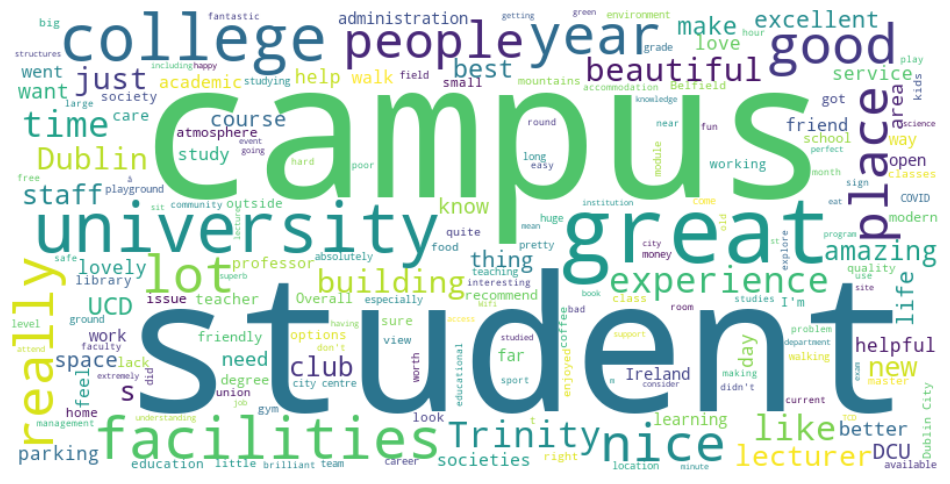

In [16]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Concatenate the text review data
reviews = " ".join(dataset["reviewBody"])
# Create the word cloud image
word_cloud=WordCloud(background_color="white",stopwords=ENGLISH_STOP_WORDS,
                     width=800,
                    height=400
                     )
# Generate the word oud using the review data
word_cloud.generate(reviews)
# Display the word cloud
plt.rcParams["figure.figsize"] = (12, 8)
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Data transformation

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [18]:
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [19]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

### Dividing dataset into training and test set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)


## Model Fitting (Random Forest)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=1)

In [22]:
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 0 16]
 [ 0 39]]


0.7090909090909091

In [23]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state = 1)
scores_rf = cross_val_score(rf, X_train, y_train, cv = 5)
scores_rf

array([0.79545455, 0.86363636, 0.81395349, 0.79069767, 0.88372093])

In [24]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean()*100, scores_rf.std()))

82.95 accuracy with a standard deviation of 0.04


# Model Fitting Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X, y)

DecisionTreeClassifier(random_state=0)

In [26]:
y_pred = dt.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[16  0]
 [ 0 39]]


1.0

In [27]:
dtree = DecisionTreeClassifier(random_state=1)
scores_dt = cross_val_score(dtree, X_train, y_train, cv = 5)
scores_dt

array([0.70454545, 0.75      , 0.88372093, 0.79069767, 0.8372093 ])

In [28]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean()*100, scores_dt.std()))

79.32 accuracy with a standard deviation of 0.06


# K Nearest Neighbors (Unsupervised)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = neigh.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[13  3]
 [10 29]]


0.7636363636363637

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(knn, X_train, y_train, cv = 5)
scores_knn

array([0.59090909, 0.61363636, 0.53488372, 0.41860465, 0.48837209])

In [32]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean()*100, scores_knn.std()))

52.93 accuracy with a standard deviation of 0.07


### Model fitting (Naive Bayes)

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [35]:
# Model Performance
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[10  6]
 [ 9 30]]


0.7272727272727273

In [36]:
gnb = GaussianNB()
scores_gnb = cross_val_score(gnb, X_train, y_train, cv = 5)
scores_gnb

array([0.77272727, 0.75      , 0.81395349, 0.74418605, 0.74418605])

In [37]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_gnb.mean()*100, scores_gnb.std()))

76.50 accuracy with a standard deviation of 0.03


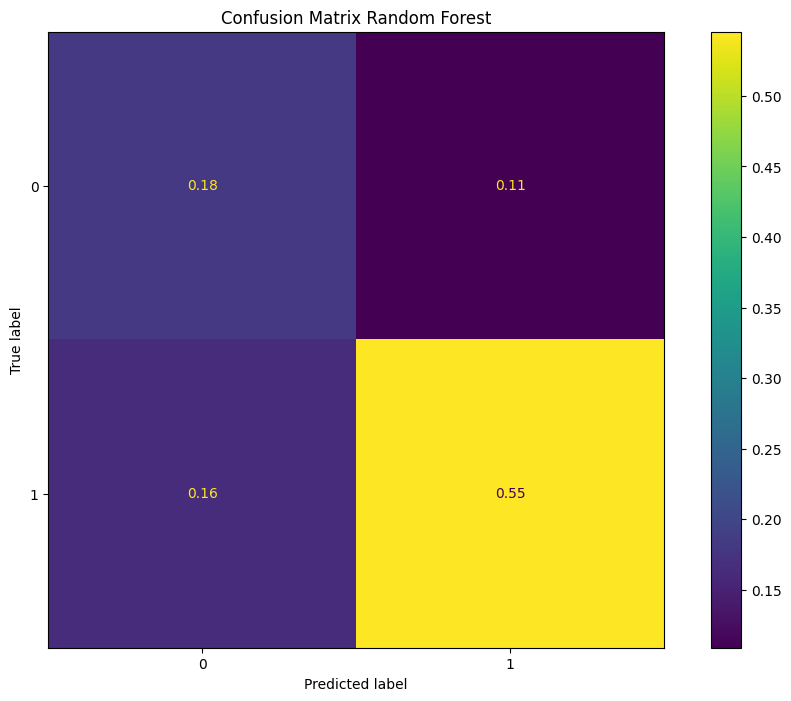

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, normalize="all")
plt.title("Confusion Matrix Random Forest")
plt.show()


### Model Fitting (XGBOOST)

In [39]:
import xgboost as xgb 
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
print(); print(model)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [40]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 7  9]
 [ 4 35]]


0.7636363636363637

In [41]:
xgb = xgb.XGBClassifier(random_state = 1, learning_rate=0.02, n_estimators=300)
scores_xgb = cross_val_score(xgb, X_train, y_train, cv = 5)
scores_xgb

array([0.72727273, 0.77272727, 0.76744186, 0.76744186, 0.8372093 ])

In [42]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_xgb.mean()*100, scores_xgb.std()))

77.44 accuracy with a standard deviation of 0.04


### Model Fitting (SVM)

In [43]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [44]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 7  9]
 [ 4 35]]


0.7636363636363637

In [45]:
from sklearn import svm
svm = svm.SVC()
scores_svm = cross_val_score(svm, X_train, y_train, cv = 5)
scores_svm

array([0.77272727, 0.77272727, 0.81395349, 0.79069767, 0.81395349])

In [46]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_svm.mean()*100, scores_svm.std()))

79.28 accuracy with a standard deviation of 0.02


### Model Fitting (Logistic Regression)


In [47]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [48]:
y_pred = reg.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[ 7  9]
 [ 0 39]]


0.8363636363636363

In [49]:
reg = LogisticRegression()
scores_reg = cross_val_score(reg, X_train, y_train, cv = 5)
scores_reg

array([0.81818182, 0.81818182, 0.79069767, 0.8372093 , 0.88372093])

In [50]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_reg.mean()*100, scores_reg.std()))

82.96 accuracy with a standard deviation of 0.03


### Data Analysis

In [51]:
df = pd.read_excel('CompileReviews-8-11-2022.xlsx')

In [52]:
df.head()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5.0,5.0,2014,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5.0,5.0,2014,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
2,Omar Nicolai,I know this building has over 200 years of var...,5.0,5.0,2014,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5.0,5.0,2014,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5.0,5.0,2014,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive


In [53]:
df.isna().sum()

author              0
reviewBody         56
reviewRating        1
ratingMaxvalue      1
dateCreated         0
reviewUrl           0
reviewSource        0
name                0
address             0
Sentiment         283
dtype: int64

In [54]:
df.dropna()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5.0,5.0,2014,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5.0,5.0,2014,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
2,Omar Nicolai,I know this building has over 200 years of var...,5.0,5.0,2014,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5.0,5.0,2014,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5.0,5.0,2014,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
5,Hiberniaworld Group,Lots of teenegers and youths making trouble wh...,5.0,5.0,2014,https://www.google.com/maps/contrib/1049183914...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
6,John Rock,"Excellent campus, really beautiful and modern....",5.0,5.0,2015,https://www.google.com/maps/contrib/1020293287...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
7,Dr. Ajmal Ayub,"Great team, great people, great campus, good w...",5.0,5.0,2015,https://www.google.com/maps/contrib/1068160286...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
8,Andre Skyberg,"Amazing campus with a good vibe, just missing ...",5.0,5.0,2015,https://www.google.com/maps/contrib/1151439078...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive
9,Alan Kelly,Played a match on the GAA pitch vs St Brendan'...,4.0,5.0,2015,https://www.google.com/maps/contrib/1155086436...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",Positive


In [55]:
Sentiment_calc_1=df.drop(['Sentiment'], axis=1)

In [56]:
def sentiments(rating):
    if  (rating >= 3):
        return 1
   # elif (rating >= 3) and (rating < 4):
    #    return 'Neutral'
    elif (rating < 3):
        return 0
   # else: return 'Neutral'
# Add sentiments to the data
Sentiment_calc_1['Sentiment'] = Sentiment_calc_1['reviewRating'].apply(sentiments)

In [57]:
Sentiment_calc_1.head()

,author,reviewBody,reviewRating,ratingMaxvalue,dateCreated,reviewUrl,reviewSource,name,address,Sentiment
0,Dermot Dunne,Stunning new university campus near Dublin cit...,5.0,5.0,2014,https://www.google.com/maps/contrib/1172180627...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
1,jorge garcia rey,"Great campus to go for a walk, and with a coup...",5.0,5.0,2014,https://www.google.com/maps/contrib/1018313073...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
2,Omar Nicolai,I know this building has over 200 years of var...,5.0,5.0,2014,https://www.google.com/maps/contrib/1069724274...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
3,ruth connolly,Great place to sit or exercise. Well kept safe...,5.0,5.0,2014,https://www.google.com/maps/contrib/1090465921...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0
4,Fintan Moloney,"Nice college grounds area for walking, jogging...",5.0,5.0,2014,https://www.google.com/maps/contrib/1052988761...,www.google.com,"TU Dublin, Aungier Street","TU Dublin, Aungier Street",1.0


### Visualisation of review sources

<AxesSubplot: ylabel='reviewSource'>

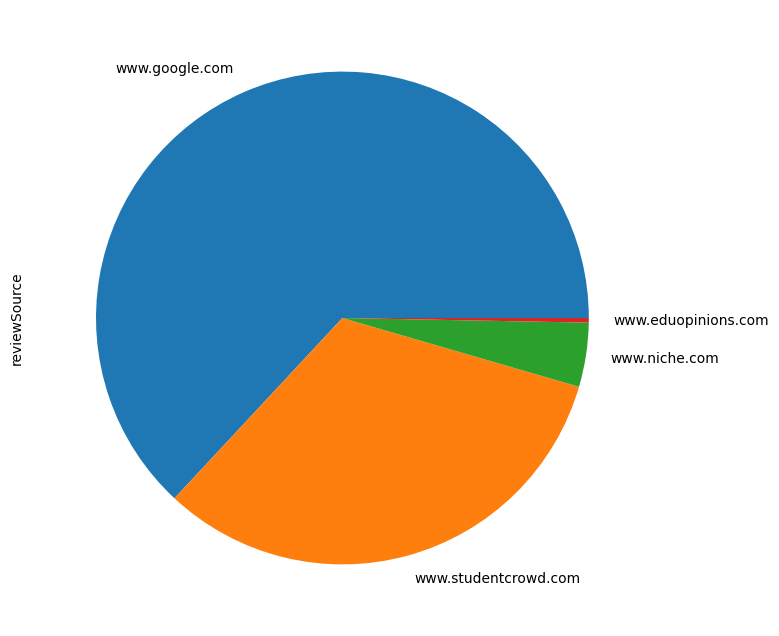

In [58]:
#plot = Sentiment_calc_1.plot.pie(y='', figsize =(5,5))
Sentiment_calc_1['reviewSource'].value_counts().plot(kind='pie')

As we can see, the most reviews are from google, followed by studentcroud

### Reviews sorted by campus

<AxesSubplot: >

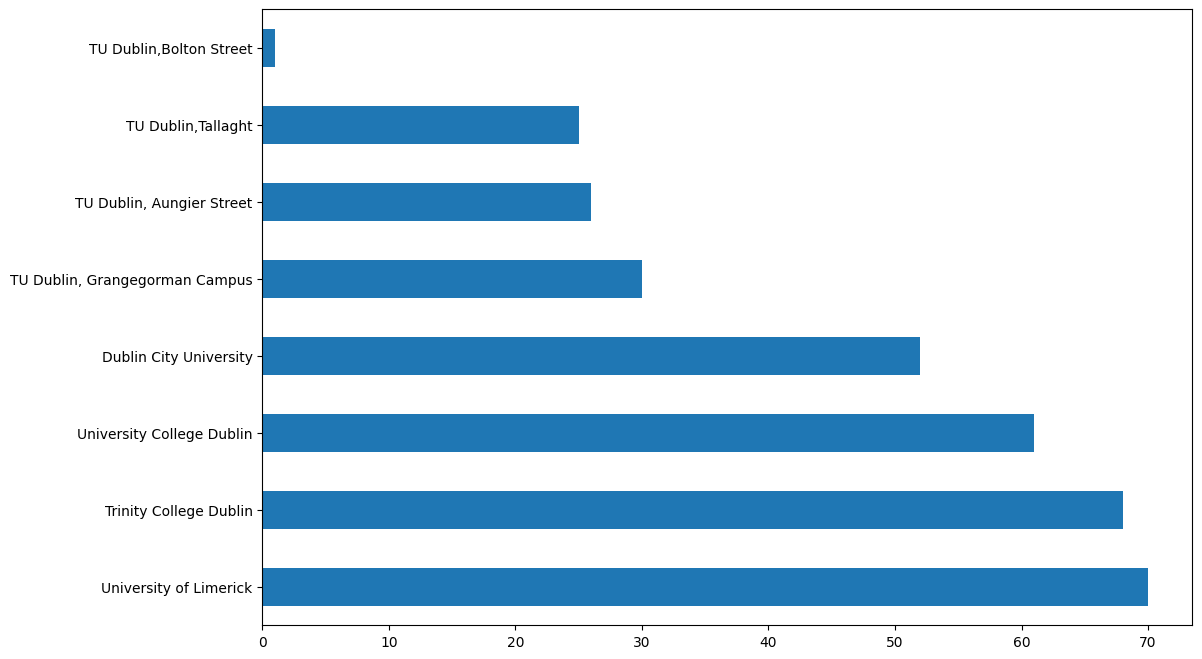

In [59]:
Sentiment_calc_1['name'].value_counts().plot(kind='barh')

### Comparison of sentiment scores

<AxesSubplot: >

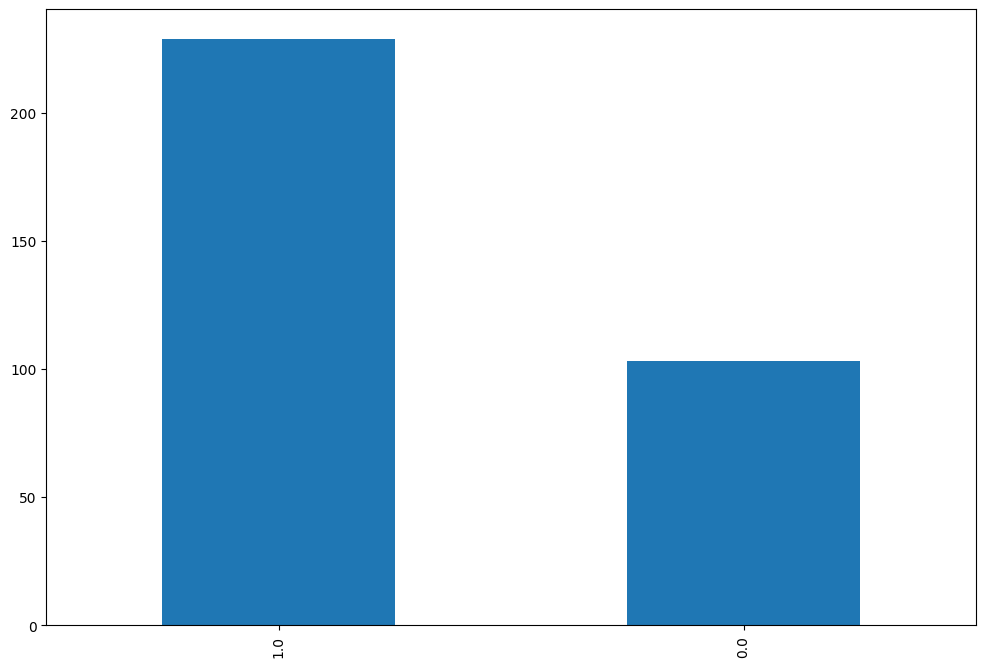

In [60]:
Sentiment_calc_1['Sentiment'].value_counts().plot(kind='bar')

### As visualised above, there is a class imbalance in the target variable with many more positive values as compared to negative values. We are going to be performing oversampling on this dataset and then recalculating the model accuracies after the oversampling

### Oversampling


In [61]:
#Load the dataset

df = pd.read_csv('dataset.csv')

In [62]:
df.head()

,Unnamed: 0,reviewBody,Sentiment
0,0,Stunning new university campus near Dublin cit...,1.0
1,1,"Great campus to go for a walk, and with a coup...",1.0
2,2,I know this building has over 200 years of var...,1.0
3,3,Great place to sit or exercise. Well kept safe...,1.0
4,4,"Nice college grounds area for walking, jogging...",1.0


In [63]:
df['Sentiment'].value_counts()

1.0    210
0.0     65
Name: Sentiment, dtype: int64

In [64]:
df['Sentiment'] = df['Sentiment'].astype(str)
df.dtypes

Unnamed: 0     int64
reviewBody    object
Sentiment     object
dtype: object

In [65]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size = 0.20, random_state =1)


In [66]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [67]:
from collections import Counter
counter = Counter(y_resampled)
print(counter)

Counter({1: 209, 0: 209})


In [68]:
print (y_resampled.shape)

(418,)


### Oversampled Random Forest

In [69]:
rf = RandomForestClassifier(max_depth=2, random_state=1)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=2, random_state=42)

In [70]:
y_pred_resampled = rf.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[14  2]
 [18 21]]


0.6363636363636364

In [71]:
rf = RandomForestClassifier(random_state =1)
scores_rf = cross_val_score(rf, X_train_resampled, y_train_resampled, cv = 10)
scores_rf

array([0.72727273, 0.81818182, 0.95454545, 0.81818182, 0.77272727,
       0.72727273, 0.81818182, 0.95238095, 0.95238095, 0.80952381])

In [72]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_rf.mean()*100, scores_rf.std()))

83.51 accuracy with a standard deviation of 0.08


### Oversampled Decision Tree

In [73]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

In [74]:
y_pred_resampled = dt.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[16  0]
 [ 0 39]]


1.0

In [75]:
dt = DecisionTreeClassifier(random_state =1)
scores_dt = cross_val_score(dt, X_train_resampled, y_train_resampled, cv = 10)
scores_dt

array([0.63636364, 0.68181818, 0.77272727, 0.81818182, 0.86363636,
       0.86363636, 0.77272727, 0.95238095, 0.9047619 , 0.71428571])

In [76]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_dt.mean()*100, scores_dt.std()))

79.81 accuracy with a standard deviation of 0.10


### Oversampled KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred_resampled = neigh.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[15  1]
 [16 23]]


0.6909090909090909

In [115]:
knn = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(knn, X_train_resampled, y_train_resampled, cv = 10)
scores_knn

array([0.36363636, 0.54545455, 0.54545455, 0.5       , 0.63636364,
       0.5       , 0.45454545, 0.52380952, 0.61904762, 0.42857143])

In [116]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean()*100, scores_knn.std()))

51.17 accuracy with a standard deviation of 0.08


### Oversampled Naive Bayes

In [81]:
classifier = GaussianNB()
classifier.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [82]:
y_pred_resampled = classifier.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[10  6]
 [ 9 30]]


0.7272727272727273

In [83]:
classifier = GaussianNB()
scores_gnb = cross_val_score(classifier, X_train_resampled, y_train_resampled, cv = 10)
scores_gnb

array([0.59090909, 0.86363636, 0.72727273, 0.86363636, 0.72727273,
       0.86363636, 0.77272727, 0.71428571, 0.80952381, 0.66666667])

In [84]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_gnb.mean()*100, scores_gnb.std()))

76.00 accuracy with a standard deviation of 0.09


### Oversampled XGBOOST

In [85]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [86]:
y_pred_resampled = model.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[ 7  9]
 [ 4 35]]


0.7636363636363637

In [87]:
model = xgb.XGBClassifier()
scores_xgb = cross_val_score(model, X_train_resampled, y_train_resampled, cv = 10)
scores_xgb

array([0.77272727, 0.68181818, 0.86363636, 0.72727273, 0.81818182,
       0.81818182, 0.81818182, 0.95238095, 0.80952381, 0.80952381])

In [88]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_xgb.mean()*100, scores_xgb.std()))

80.71 accuracy with a standard deviation of 0.07


### Oversampled SVM

In [89]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [90]:
y_pred_resampled = clf.predict(X_test_resampled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[ 7  9]
 [ 4 35]]


0.7636363636363637

In [91]:
clf = svm.SVC(kernel='linear') # Linear Kernel
scores_svm = cross_val_score(clf, X_train_resampled, y_train_resampled, cv = 10)
scores_svm

array([0.72727273, 0.81818182, 0.86363636, 0.77272727, 0.86363636,
       0.68181818, 0.81818182, 0.95238095, 0.9047619 , 0.80952381])

In [92]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_svm.mean()*100, scores_svm.std()))

82.12 accuracy with a standard deviation of 0.08


### Oversampled Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = reg.predict(X_test_resampled)

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_resampled, y_pred_resampled)
print(cm)

accuracy_score(y_test_resampled, y_pred_resampled)

[[ 7  9]
 [ 0 39]]


0.8363636363636363

In [95]:
reg = LogisticRegression()
scores_reg = cross_val_score(reg, X_train_resampled, y_train_resampled, cv = 10)
scores_reg

array([0.77272727, 0.86363636, 0.90909091, 0.81818182, 0.81818182,
       0.77272727, 0.77272727, 0.95238095, 0.9047619 , 0.80952381])

In [96]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_reg.mean()*100, scores_reg.std()))

83.94 accuracy with a standard deviation of 0.06


# ROC CURVES

In [102]:
from sklearn.metrics import RocCurveDisplay

### ROC for Random Forest

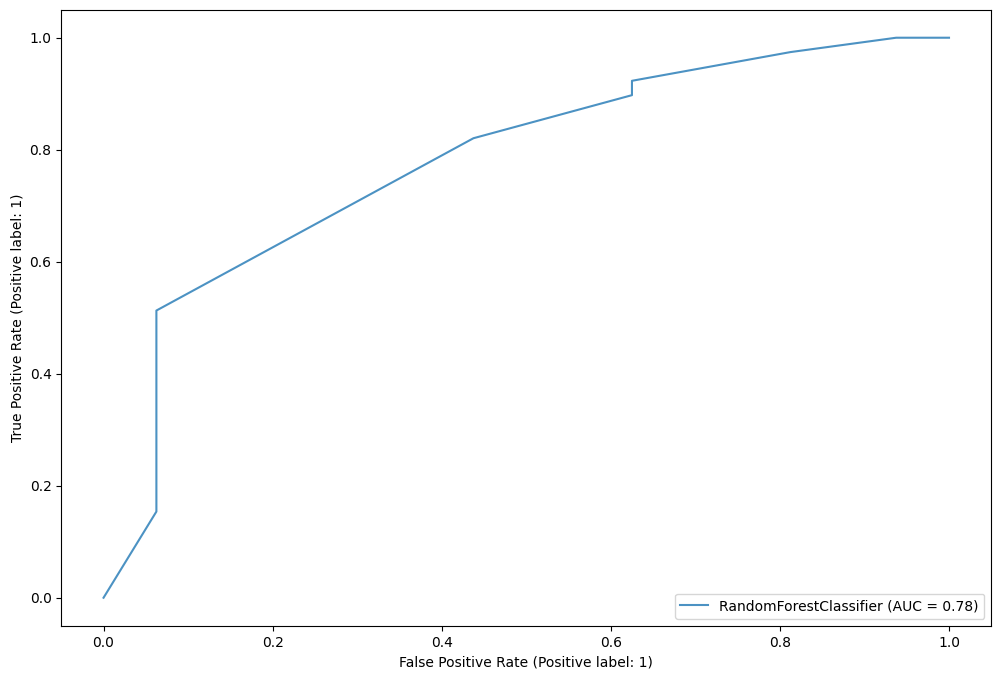

In [110]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show()

### ROC for Decision Tree

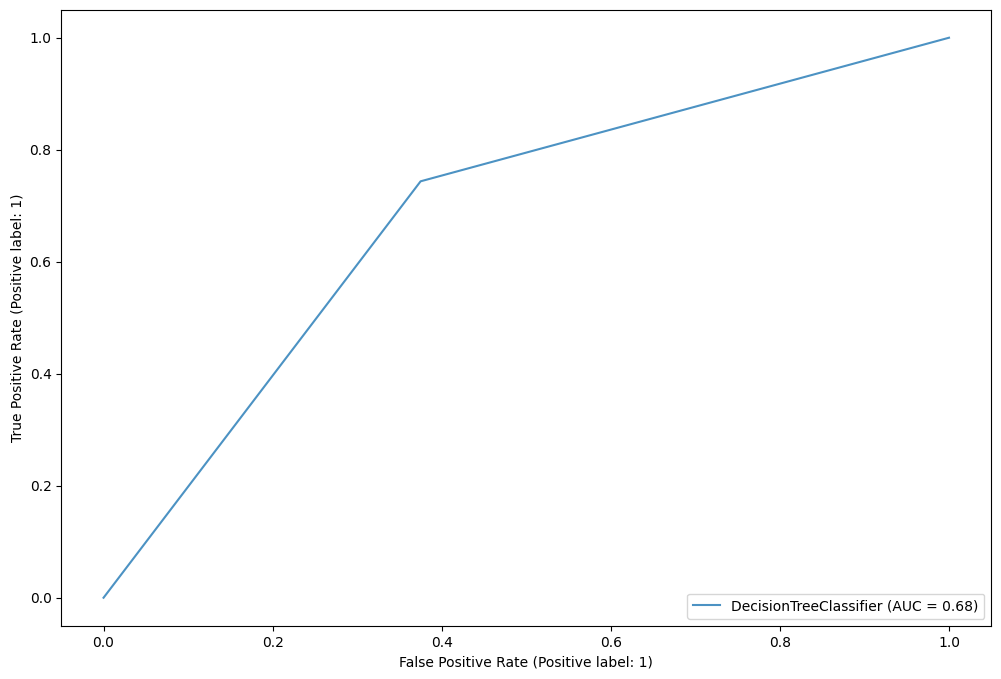

In [114]:
dt = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
dtree_disp = RocCurveDisplay.from_estimator(dtree, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show()


### ROC for KNN

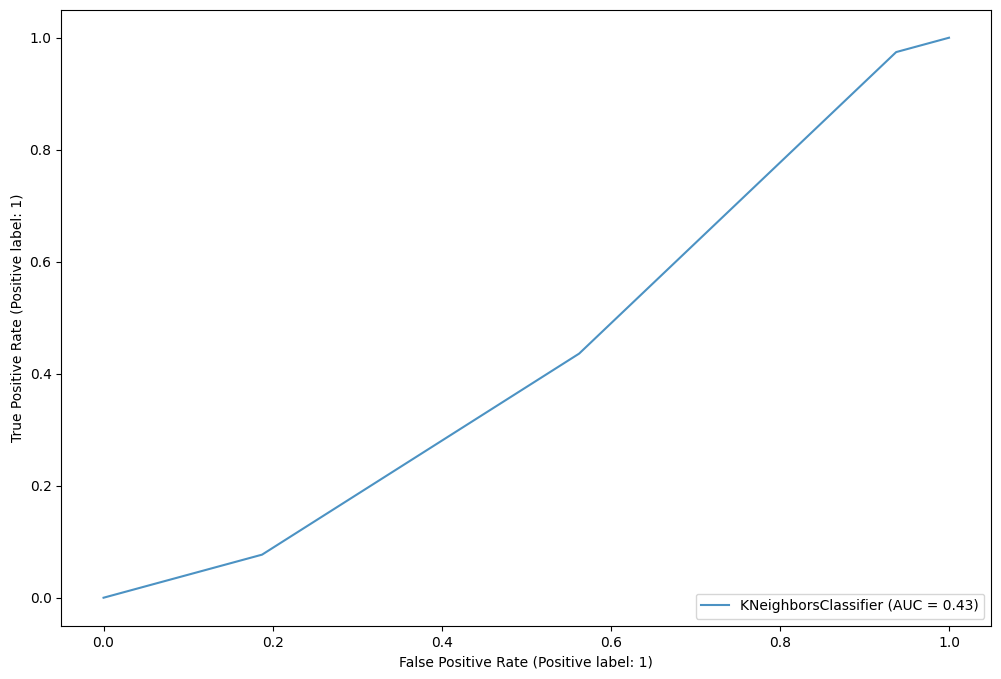

In [118]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
knn_disp = RocCurveDisplay.from_estimator(knn, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show()

### ROC for Naive Bayes

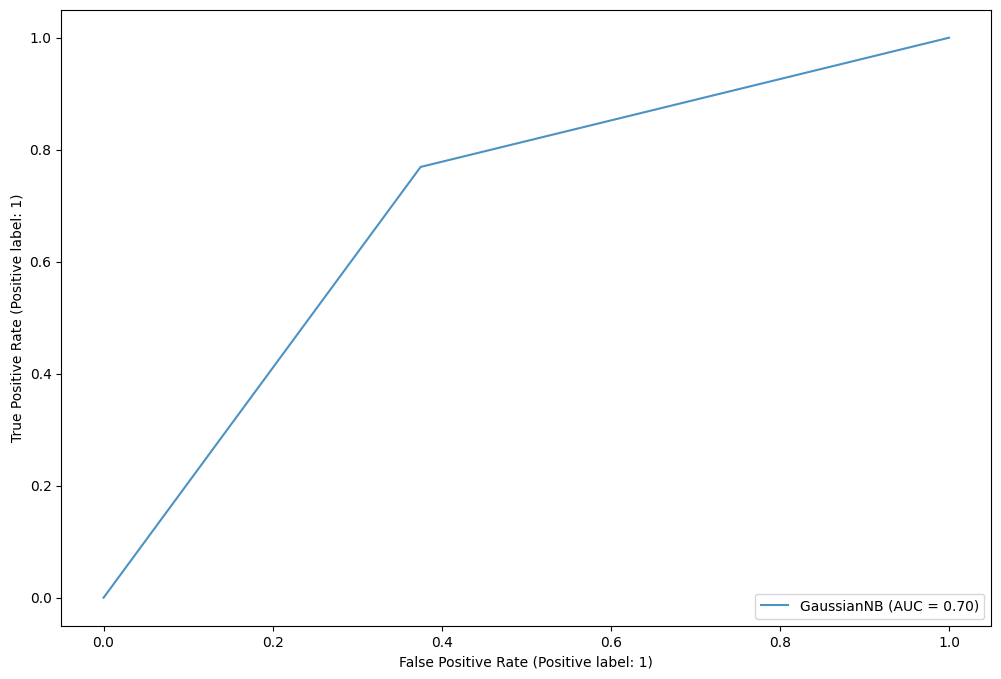

In [119]:
classifier = GaussianNB()
classifier.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
classifier_disp = RocCurveDisplay.from_estimator(classifier, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show()

### ROC for XGBOOST

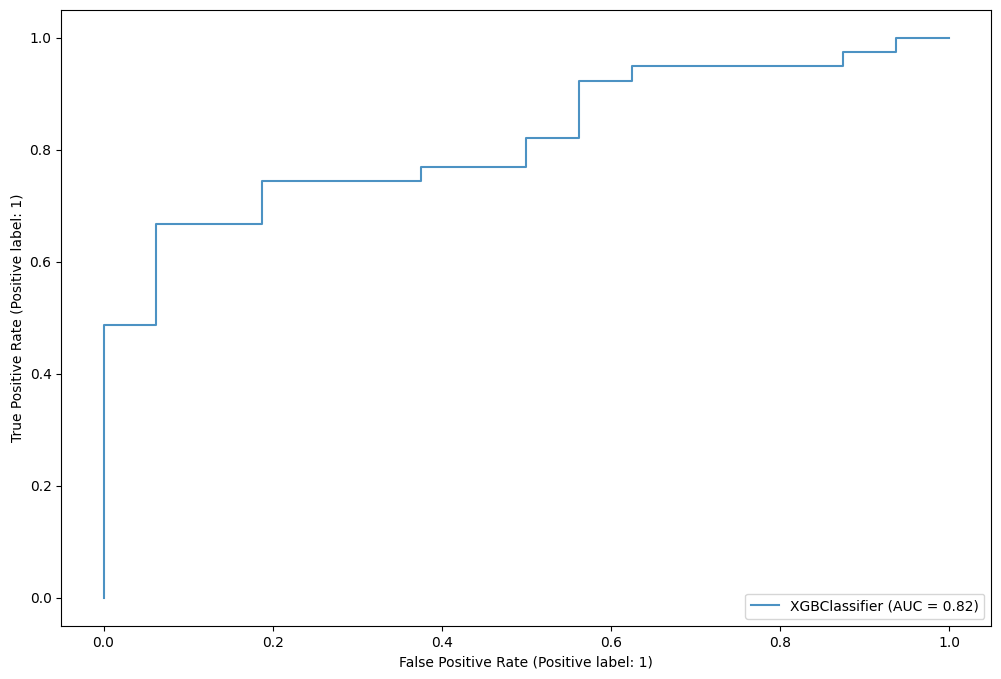

In [120]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
model_disp = RocCurveDisplay.from_estimator(model, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show()


### ROC for SVM

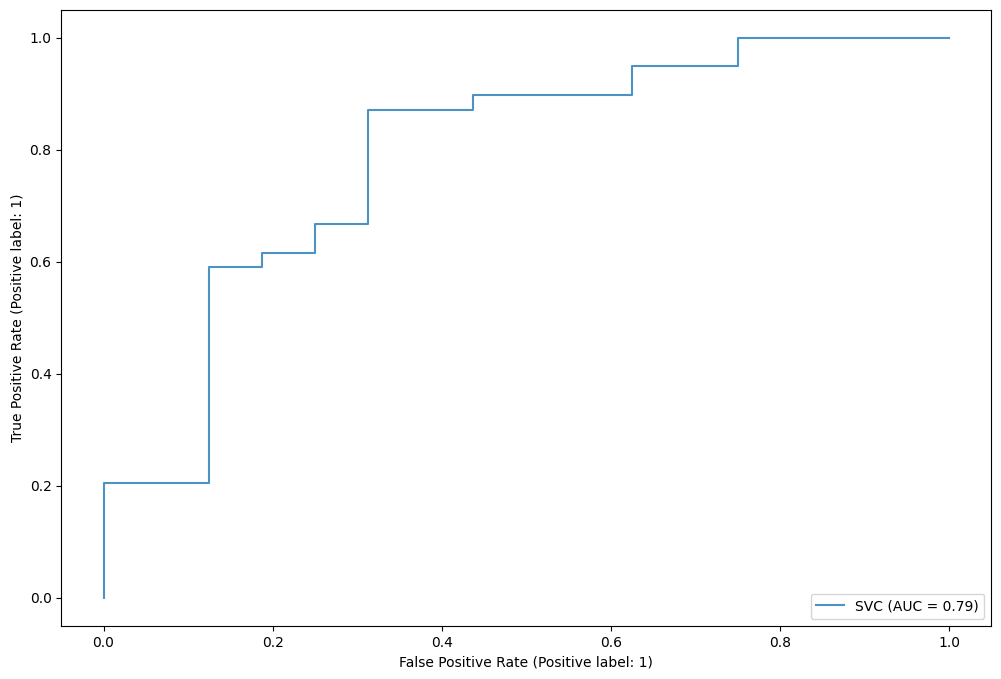

In [122]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
clf_disp = RocCurveDisplay.from_estimator(clf, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show()

### ROC for Logistic Regression

<function matplotlib.pyplot.show(close=None, block=None)>

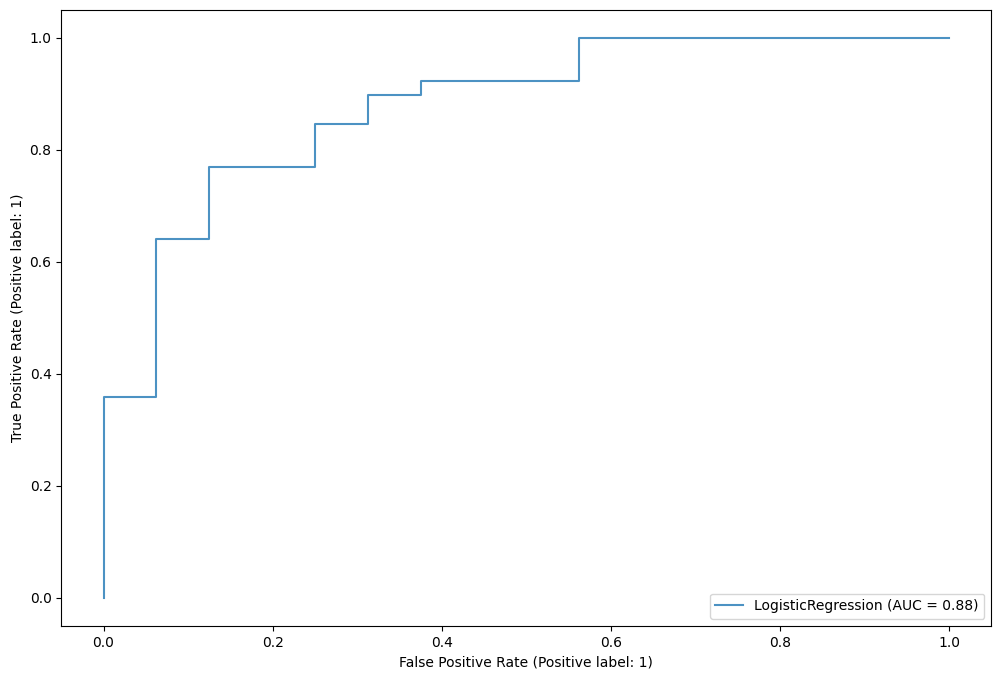

In [124]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_resampled, y_train_resampled)
ax = plt.gca()
reg_disp = RocCurveDisplay.from_estimator(reg, X_test_resampled, y_test_resampled, ax=ax, alpha=0.8)
plt.show

### Comparison of all ROCs


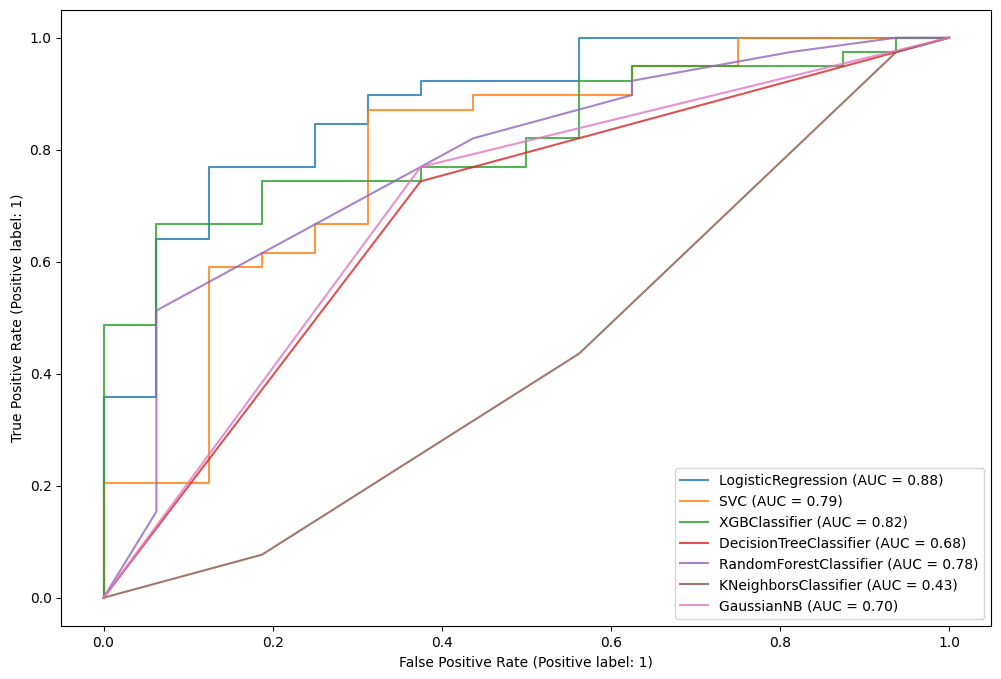

In [128]:
ax = plt.gca()
reg_disp.plot(ax=ax, alpha=0.8)
clf_disp.plot(ax=ax, alpha=0.8)
model_disp.plot(ax=ax, alpha=0.8)
dtree_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
knn_disp.plot(ax=ax, alpha=0.8)
classifier_disp.plot(ax=ax, alpha=0.8)
plt.show()
